In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv(r"C:\Users\hp_625\Desktop\realKnownCause\realKnownCause\ambient_temperature_system_failure.csv")

In [3]:
#df1.set_index('timestamp')
df1.isnull().sum()

timestamp    0
value        0
dtype: int64

<AxesSubplot:xlabel='timestamp'>

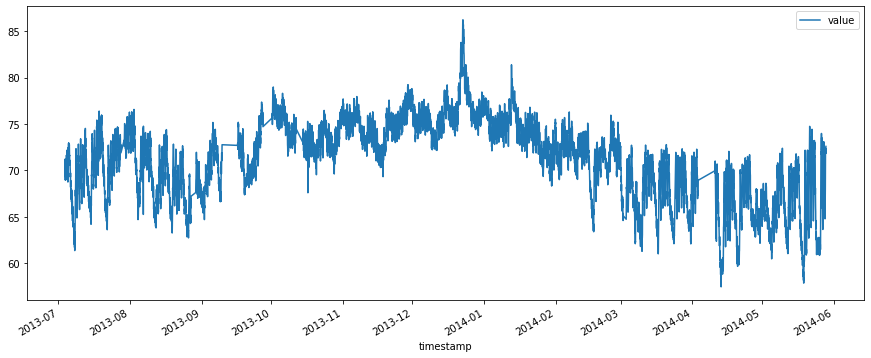

In [4]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1.plot(x='timestamp', figsize=(15, 6))

In [5]:
df = pd.read_csv(r"C:\Users\hp_625\Desktop\realKnownCause\realKnownCause\ambient_temperature_system_failure.csv")

In [7]:
df2=df["timestamp"].str.split(' ',expand=True)
df2.columns=['date','hour']
final_df = pd.concat([df,df2],axis=1)

final_df['date'] = pd.to_datetime(final_df['date'])
final_df['dayofweek'] = final_df['date'].apply(lambda time: time.dayofweek)

mask = (pd.to_timedelta(final_df['hour']).between(pd.Timedelta('6h'),pd.Timedelta('18h')))
final_df['daylight'] = np.where(mask, 1, 0)

final_df['year'] = pd.to_datetime(final_df['timestamp']).dt.year
final_df['month']=pd.to_datetime(final_df['timestamp']).dt.month
final_df['isweekend'] = final_df['dayofweek'] >= 5
final_df



,timestamp,value,date,hour,dayofweek,daylight,year,month,isweekend
0,2013-07-04 00:00:00,69.880835,2013-07-04,00:00:00,3,0,2013,7,False
1,2013-07-04 01:00:00,71.220227,2013-07-04,01:00:00,3,0,2013,7,False
2,2013-07-04 02:00:00,70.877805,2013-07-04,02:00:00,3,0,2013,7,False
3,2013-07-04 03:00:00,68.959400,2013-07-04,03:00:00,3,0,2013,7,False
4,2013-07-04 04:00:00,69.283551,2013-07-04,04:00:00,3,0,2013,7,False
...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,2014-05-28,11:00:00,2,1,2014,5,False
7263,2014-05-28 12:00:00,72.172956,2014-05-28,12:00:00,2,1,2014,5,False
7264,2014-05-28 13:00:00,72.046565,2014-05-28,13:00:00,2,1,2014,5,False
7265,2014-05-28 14:00:00,71.825226,2014-05-28,14:00:00,2,1,2014,5,False


<AxesSubplot:title={'center':'Value Distribution'}, ylabel='Frequency'>

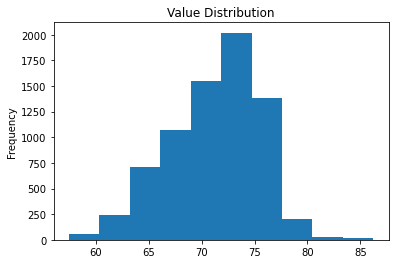

In [8]:
final_df['value'].plot(
    kind='hist',
    title='Value Distribution')

<AxesSubplot:title={'center':'Value Distribution'}>

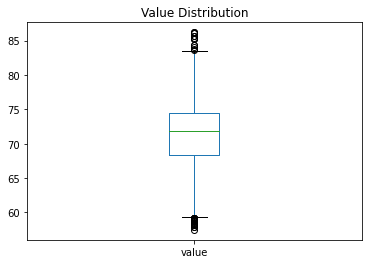

In [9]:
final_df['value'].plot(
        kind='box',
        title='Value Distribution')

<AxesSubplot:title={'center':'Year Distributions of Values'}>

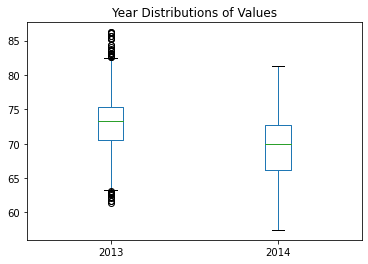

In [10]:
final_df.pivot(columns='year', values='value').plot(
        kind='box',
        title='Year Distributions of Values')

<AxesSubplot:title={'center':'Week Distributions of Values'}>

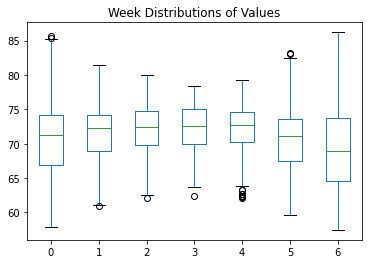

In [17]:
final_df.pivot(columns='dayofweek', values='value').plot(
        kind='box',
        title='Week Distributions of Values')


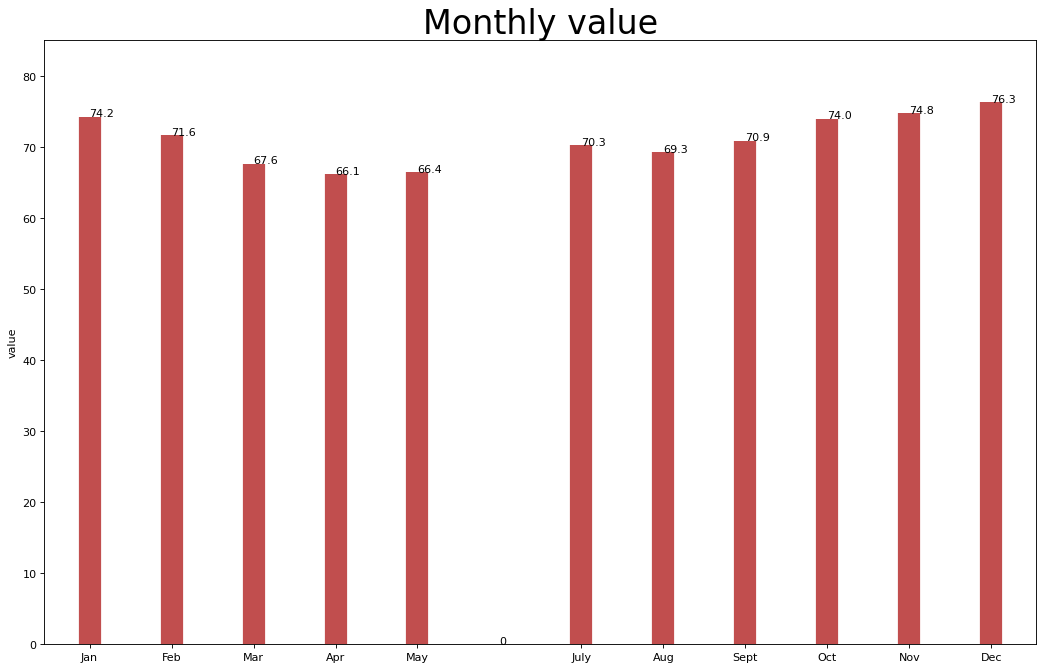

In [19]:
df = final_df[['value', 'month']].groupby('month').apply(lambda x: x.mean())

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.month, ymin=0, ymax=df.value, color='firebrick', alpha=0.8, linewidth=20)

for i, value in enumerate(df.value):
    if i < 5:
        ax.text(i+1, value, round(value, 1))
        
    else:
        ax.text(i+2, value, round(value, 1))
ax.text(6,0,0)
   
ax.set_title('Monthly value', fontdict={'size':30})
ax.set(ylabel='value', ylim=(0, 85))
ax.set_xticks(df.month)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','July','Aug','Sept','Oct','Nov','Dec'])


plt.show()

In [20]:
from sklearn.model_selection import train_test_split
final_df_train,final_df_test = train_test_split(final_df)
print(final_df_train)
print(final_df_test)

,timestamp,value,date,hour,dayofweek,daylight,year,month,isweekend
1324,2013-08-31 11:00:00,67.316241,2013-08-31,11:00:00,5,1,2013,8,True
5249,2014-02-24 12:00:00,72.812697,2014-02-24,12:00:00,0,1,2014,2,False
5168,2014-02-21 03:00:00,71.776787,2014-02-21,03:00:00,4,0,2014,2,False
6877,2014-05-12 10:00:00,66.008504,2014-05-12,10:00:00,0,1,2014,5,False
6851,2014-05-11 08:00:00,64.647848,2014-05-11,08:00:00,6,1,2014,5,True
...,...,...,...,...,...,...,...,...,...
6325,2014-04-19 10:00:00,65.117534,2014-04-19,10:00:00,5,1,2014,4,True
296,2013-07-16 08:00:00,68.271033,2013-07-16,08:00:00,1,1,2013,7,False
34,2013-07-05 10:00:00,70.300557,2013-07-05,10:00:00,4,1,2013,7,False
3966,2014-01-02 01:00:00,76.374525,2014-01-02,01:00:00,3,0,2014,1,False
